In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("drive")

Mounted at drive


In [ ]:
testX = np.load("drive/MyDrive/Datasets/lc/v4/testX.npy").astype(np.float32)
testY = np.load("drive/MyDrive/Datasets/lc/v4/testY.npy").astype(np.float32)

In [ ]:
testX = (testX-127.0)/127.0
testY = (testY>127).astype(np.float32)

In [ ]:
print(testX.dtype)
print(testY.dtype)

float32
float32


In [ ]:
testX = np.reshape(testX, (len(testX), 512, 512, 1))
testY = np.reshape(testY, (len(testY), 512, 512, 1))

print(testX.shape)
print(testY.shape)

(335, 512, 512, 1)
(335, 512, 512, 1)


In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [ ]:
model = tf.keras.models.load_model("drive/MyDrive/Datasets/lc/v4/Training_Logs/1st_Trial/LC_UNet_best_Model_checkpoint.h5", custom_objects={'dice_coef':dice_coef, 'dice_coef_loss':dice_coef_loss})

In [ ]:
# model.summary()

In [ ]:
with tf.device("/device:GPU:0"):
  pred = model.predict(testX)

In [ ]:
def display(true, pred, X, m=0, n=50):
  n = len(list(true[m:n]))
  r = n//2 if n%2==0 else (n//2)+1
  plt.figure(figsize=(20,5*r))
  for i,(t, p, x) in enumerate(zip(true[m:n],pred[m:n],X[m:n])):
    t = np.squeeze(t)
    p = np.squeeze(p)
    x = np.squeeze(x)
    groundtruth = cv2.addWeighted(x,.5,t,.5,0)
    prediction = cv2.addWeighted(x,.5,p,.5,0)
    plt.subplot(r,2,i+1)
    plt.title("GroundTruth"+" "*36+"Prediction")
    ig = np.hstack((groundtruth, prediction))
    plt.imshow(ig, cmap="bone")

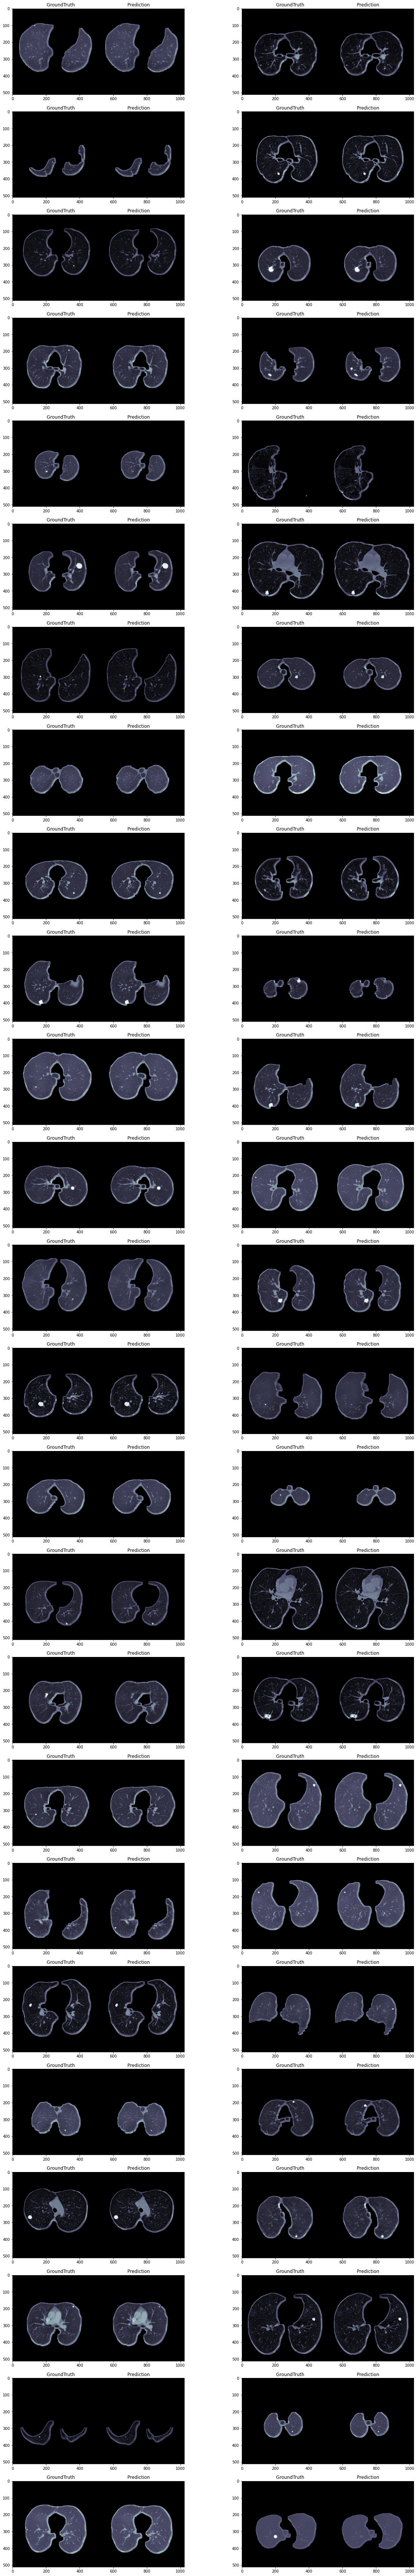

In [ ]:
display(testY,pred,testX)